# This is Heart Disease Prediction Project
We are goingf to predict based on the data whether someone have the heart disease or not 
1_ Problem Definition
2_ Data 
3_ Evaluate 
4_ Feature
5_ Modelling
6_ Experimentations

# Problem Definition 
> Based on the given data write need to predict if a patient has heart disease or not

# Data 
> We have the data and have loaded already

# Evaluate 
> In initial stages we need to make sure. if our model gives us the accuracy of 95 %

# Features 
> What features are import what features columns means what
age
age in years

sex
(1 = male; 0 = female)

cp
chest pain type

trestbps
resting blood pressure (in mm Hg on admission to the hospital)

chol
serum cholestoral in mg/dl

fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg
resting electrocardiographic results

thalach
maximum heart rate achieved

exang
exercise induced angina (1 = yes; 0 = no)

oldpeak
ST depression induced by exercise relative todummy values.

# Tools Preparation

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing Models of  sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  # Corrected spelling
from sklearn.ensemble import RandomForestClassifier
# Import Evalution laibraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Exploring the data Initial stage
1- what problem i am going to solve 
2- what kind of data i have
3- Does this data have missing values
4- Are there any outlier, sporious vectors 
5- Can we add or remove some of the features 

In [10]:
df= pd.read_csv("heart.csv")

In [11]:
df.shape

(303, 14)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

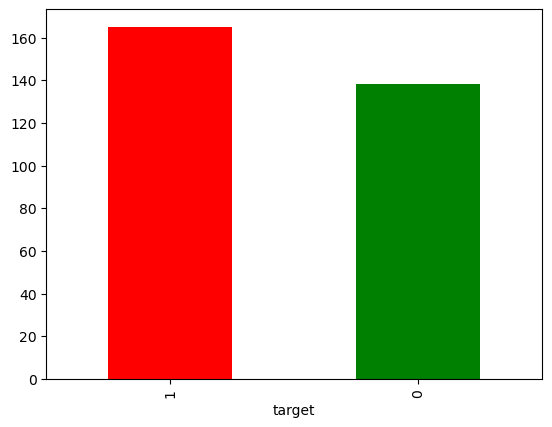

In [15]:
df["target"].value_counts().plot(kind="bar",color=["red","green"]);

In [16]:
df.isna().sum() # Aer there any missing values 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [19]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


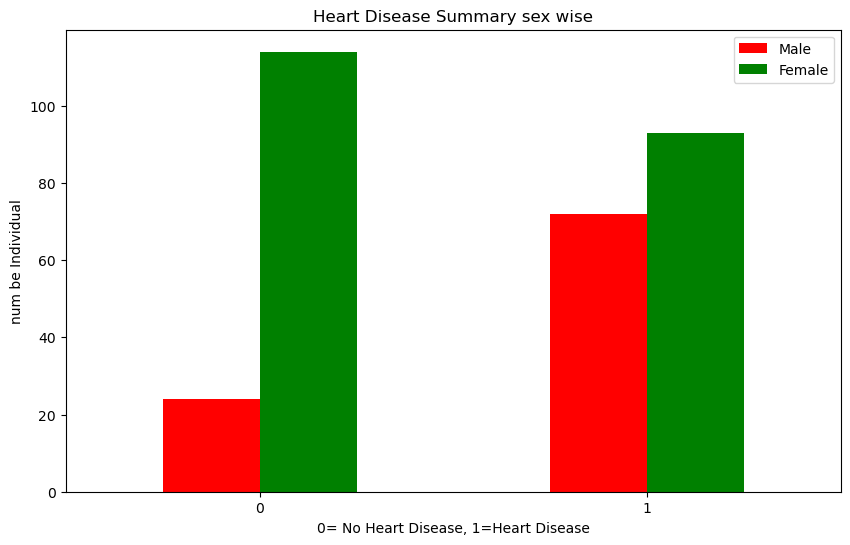

In [20]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=["red",'green'])
plt.title("Heart Disease Summary sex wise")
plt.xlabel("0= No Heart Disease, 1=Heart Disease")
plt.ylabel("num be Individual")
plt.legend(["Male","Female"])
plt.xticks(rotation=0);

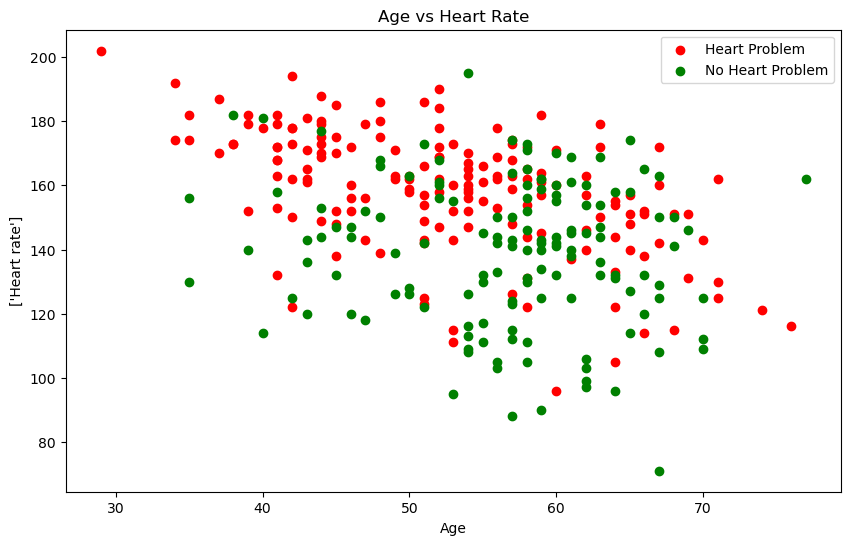

In [21]:
# Finding  Patterns in the data using Scatter Plot
plt.figure(figsize=(10,6))
# Create scatter plot 
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="green")
plt.title("Age vs Heart Rate")
plt.xlabel("Age")
plt.ylabel(["Heart rate"])
plt.legend(["Heart Problem","No Heart Problem"]);

# AGE Distribution

<Axes: ylabel='Frequency'>

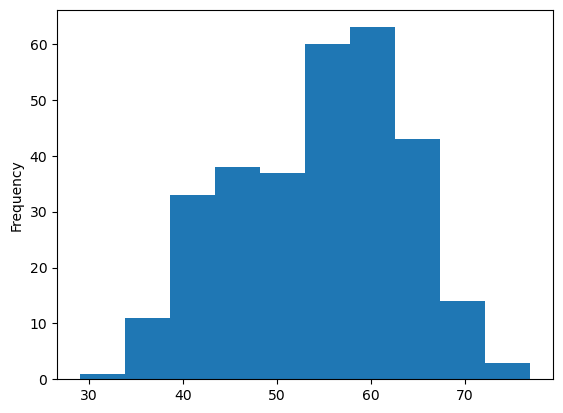

In [23]:
df.age.plot.hist()

In [24]:
df.cp.value_counts()


cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [25]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


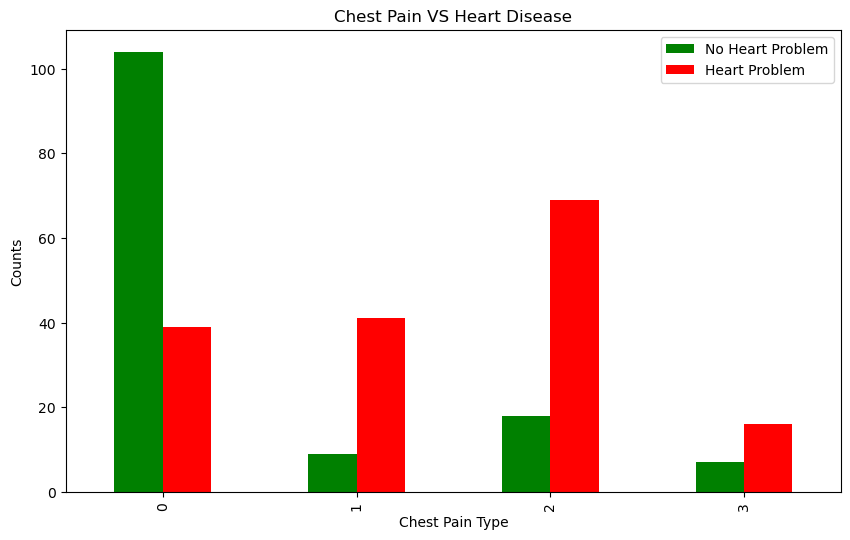

In [26]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                 color=["green","red"])
# make some dic=scription of the chart
plt.title("Chest Pain VS Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Counts")
plt.legend(["No Heart Problem","Heart Problem"]);

# Correralation Matrix

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# lets draw corrrelation map

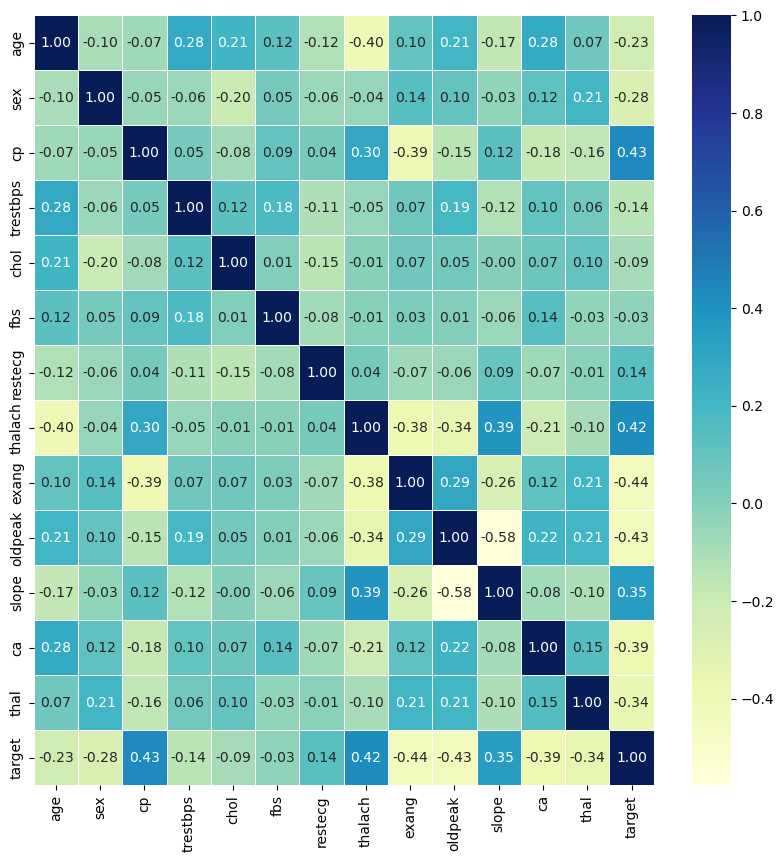

In [31]:
cor_map = df.corr()
home, room = plt.subplots(figsize=(10,10))  # No comma at the end
room = sns.heatmap(cor_map,
                   annot=True,
                   linewidths=0.5,
                   fmt="0.2f",
                   cmap="YlGnBu")
plt.show()  # Add this to display the plot

# Modeling

In [33]:
# split into train and test
x=df.drop("target",axis=1)
y=df["target"]

In [34]:
# using random seed so that others could produce the same result
np.random.seed(7)
# splite into test and train data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

 # The Modeling we are going to use
1. K-Neighbours Classifier
2. Random Forest Classifier
3. Logistic Regression

In [36]:
models={
    "KNN":KNeighborsClassifier(),
    "Random Frest":RandomForestClassifier(),
    "Logistic Regression":LogisticRegression()
}

In [37]:
# putting the model into a dictionary
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(7)
    # Create a dictionary to store model scores
    model_scores = {}
    
    # Loop through the models
    for name, model in models.items():
        model.fit(x_train, y_train)
        # Evaluate the model and append its score
        model_scores[name] = model.score(x_test, y_test)
    
    return model_scores  # Return the scores after the loop


In [38]:
model_scores = fit_and_score(models,
                             x_train=x_train,
                             x_test=x_test, 
                             y_train=y_train, 
                             y_test=y_test)
model_scores

C:\Users\babar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5573770491803278,
 'Random Frest': 0.7213114754098361,
 'Logistic Regression': 0.7540983606557377}

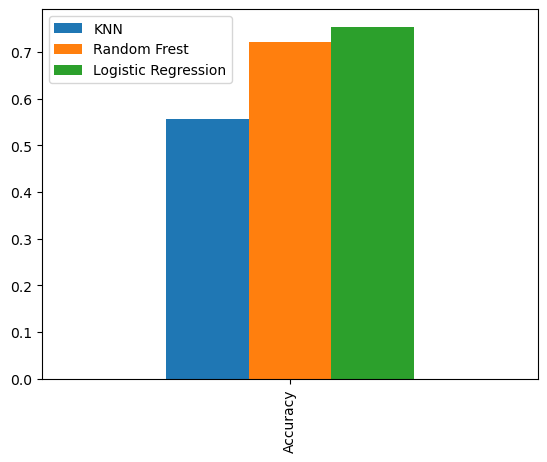

In [39]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.plot.bar();

# Improving and tuning the model
   # Universal Methods used for all Classification Probelms
   * hyperparameters Tuning
   * Features Improving 
  >Advanced Level
   * Confusion_Matrix
   * Cross__validation
   * Precision
   * Recall
   * F1
   * Classification Report
   * ROC Curveg

In [41]:
train_score=[]
test_score=[]
# Create range ti be test for n_neighbors
nneighbours=range(1,30)
# KNN Instance
KNN=KNeighborsClassifier()
# looping through the range
for i in nneighbours:
    KNN.set_params(n_neighbors=i)
    # run the fit i th value
    KNN.fit(x_train,y_train)
    # update the training score
    train_score.append(KNN.score(x_train,y_train))
    # update the test score list
    test_score.append(KNN.score(x_test,y_test))


In [42]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

In [43]:
test_score

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327]

# Plot the Accuracy Score

KNN Score :70.49%  If the accuracy of the model less than 95% this is the useless for us because our accuracy target is 95%


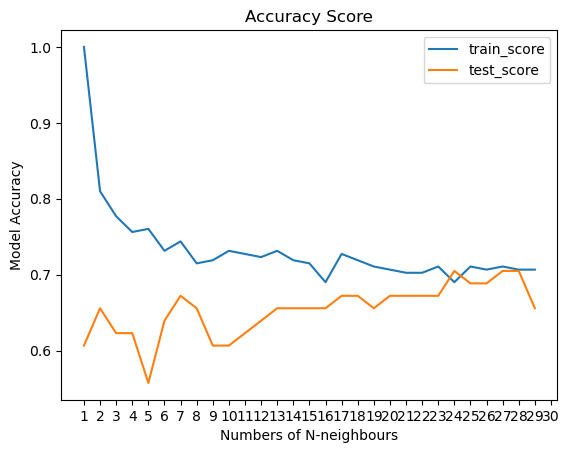

In [45]:
plt.plot(nneighbours,train_score,label="train_score")
plt.plot(nneighbours,test_score,label="test_score")
plt.xticks(np.arange(1,31,1))
plt.title("Accuracy Score")
plt.xlabel("Numbers of N-neighbours")
plt.ylabel("Model Accuracy")
plt.legend()
print(f"KNN Score :{max(test_score)*100:0.2f}%",f" If the accuracy of the model less than 95% this is the useless for us because our accuracy target is 95%")

# Hyperparameters tunning using Randomized Search CV

* Logistic Regression()
* RandomForestClassifier()

In [48]:
LR_hp={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}
RFC_hp={
    "n_estimators":np.arange(10,1600,100),
    "max_depth":[None,3,5,6,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

In [49]:
# tuning logistic Regression
np.random.seed(7)
# lets use RSCV to tune hp
lr=RandomizedSearchCV(LogisticRegression(),
                     param_distributions=LR_hp,
                     cv=5,
                     n_iter=20,
                     verbose=True
)
# fit the random hp seach model for lr
lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [50]:
lr.score(x_test,y_test)

0.7540983606557377

In [51]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [52]:
# tuning Random Forest Classifier 
np.random.seed(7)
# lets use RSCV to tune hp
rfc=RandomizedSearchCV(RandomForestClassifier(),
                     param_distributions=RFC_hp,
                     cv=5,
                     n_iter=20,
                     verbose=True
)
# fit the random hp seach model for lr
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [53]:
rfc.score(x_test,y_test)

0.7049180327868853

In [54]:
rfc.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 6}

*'KNN': 0.5573770491803278,
>'Random Forest': 0.7213114754098361, after hyperparameter tuning =0.7049180327868853
* 'Logistic Regression': 0.7540983606557377, after hypermeters tuning = 0.7540983606557377

* 1 by hand hyperparameter tuning # done it been there seen it all
* 2 Randomized Search CV   # done it been there seen it all
* 3 Grid Search CV # let see try it 

In [57]:
#  Hyperparameters using GridSearch CV
np.random.seed(7)
# lets use RSCV to tune hp
lr_gs=GridSearchCV(LogisticRegression(),
                     param_grid=LR_hp,
                     cv=5,
                     verbose=True
)
# fit the random hp seach model for lrgr
lr_gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [58]:
lr_gs.score(x_test,y_test)

0.7540983606557377

In [59]:
lr_gs.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [60]:
np.random.seed(7)
RFC_hp={
    "n_estimators":np.arange(1,101,50),
    "max_depth":[None,3,50],
    "min_samples_split":np.arange(2,8,2),
    "min_samples_leaf":np.arange(1,7,2)
}
np.random.seed(7)
# lets use RSCV to tune hp
rfc_gs=GridSearchCV(RandomForestClassifier(),
                     param_grid=RFC_hp,
                     cv=5,
                     verbose=True
)
# fit the random hp seach model for lrgr
rfc_gs.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

In [61]:
rfc_gs.score(x_test,y_test)

0.7377049180327869

In [62]:
rfc_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 51}

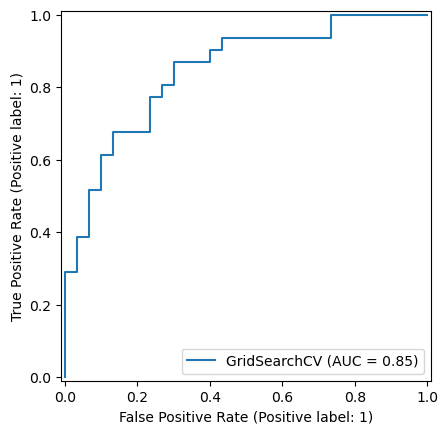

In [63]:
# ploting the Area under the curve
from sklearn.metrics import RocCurveDisplay

# Plotting the ROC curve
y_preds=lr_gs.predict(x_test)
RocCurveDisplay.from_estimator(lr_gs, x_test, y_test)


In [64]:
print(confusion_matrix(y_test,y_preds))

[[18 12]
 [ 3 28]]


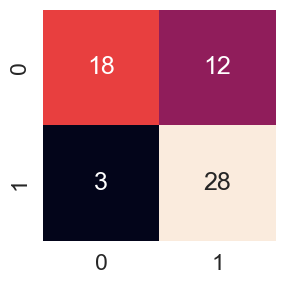

In [65]:
sns.set(font_scale=1.5)
def plot_confusion(y_test,y_preds):
    "This is plot the confusion matrix"
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                  cbar=False)

plot_confusion(y_test,y_preds)

# lets Plot the Classification Report

In [67]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



In [68]:
lr_gs.best_params_
lr=LogisticRegression(C=0.615848211066026,
                     solver='liblinear')


In [69]:
# Cross Validation Accuracy
cv_accuracy=cross_val_score(lr,
                           x,
                           y,
                           cv=7,
                           scoring="accuracy")
cv_accuracy=np.mean(cv_accuracy)
cv_accuracy

0.8284506191482934

In [70]:
# Cross Validation precision
cv_precision=cross_val_score(lr,
                           x,
                           y,
                           cv=7,
                           scoring="precision")
cv_precision=np.mean(cv_accuracy)
cv_precision

0.8284506191482934

In [71]:
# Cross Validation recall
cv_recall=cross_val_score(lr,
                           x,
                           y,
                           cv=7,
                           scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.89648033126294

In [72]:
# Cross Validation f1-score
cv_f1=cross_val_score(lr,
                           x,
                           y,
                           cv=7,
                           scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8508447334977947

# Visualizing the Cross Validated Matrices

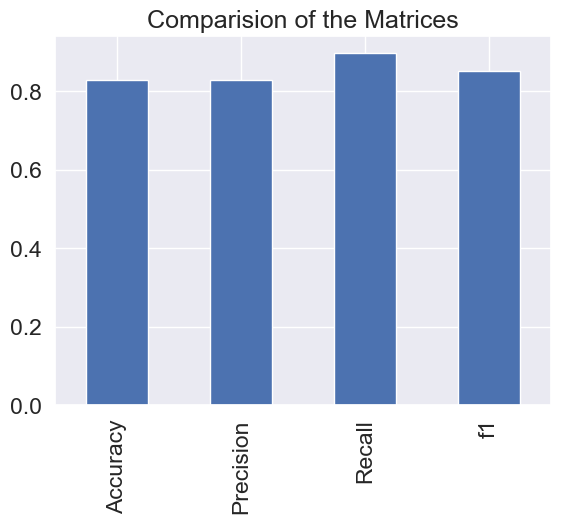

In [74]:
cv_plot=pd.DataFrame({
    "Accuracy":cv_accuracy,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "f1":cv_f1
},index=[0])
cv_plot.T.plot.bar(title="Comparision of the Matrices",
                   legend=False);

# Features Improving 

In [76]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [77]:
# check coffient 
lr.fit(x_train,y_train)
lr.coef_

array([[ 0.02258519, -1.36424618,  0.79069618, -0.02407434, -0.00186723,
         0.46020094,  0.40737683,  0.03558889, -0.78274542, -0.56757494,
         0.52792825, -0.64610992, -1.10640019]])

In [78]:
final_coef=dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': 0.02258518664970554,
 'sex': -1.3642461816765101,
 'cp': 0.7906961820556367,
 'trestbps': -0.024074344050095283,
 'chol': -0.0018672296463649782,
 'fbs': 0.4602009443093141,
 'restecg': 0.4073768321684957,
 'thalach': 0.035588889531912235,
 'exang': -0.78274542034898,
 'oldpeak': -0.5675749432335981,
 'slope': 0.5279282517877898,
 'ca': -0.6461099217862547,
 'thal': -1.1064001887853232}

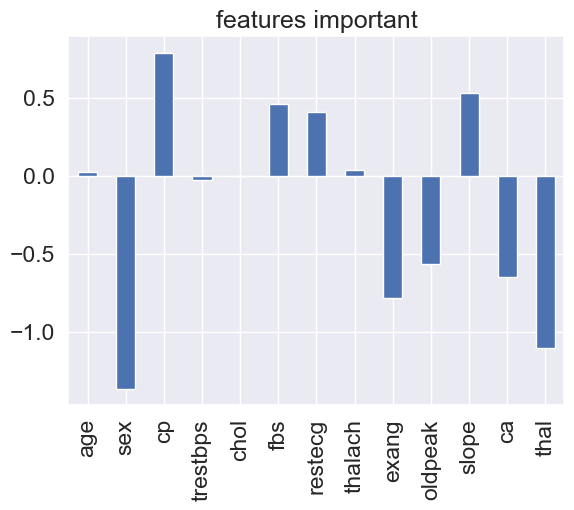

In [79]:
features=pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title="features important",legend=False);

# Conclusion